

---

# Importing necessary libraries and reading the images


---



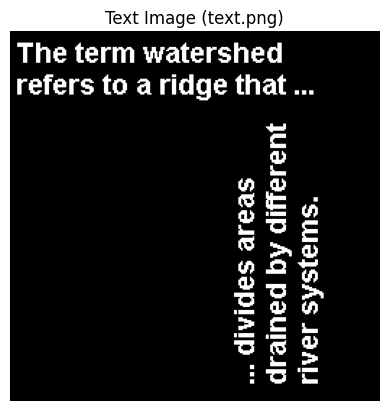

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # For GIF handling

# Define the file paths (assuming they are in /content/)
image_paths = [
    "/content/micro-blood.gif",
    "/content/test.jpg",
    "/content/text.png",
    "/content/brain.png",
    "/content/Image_Normal.png"
]

# Read images, handle 'micro-blood.gif' with PIL and the rest with OpenCV
images = []
for path in image_paths:
    if path.endswith('.gif'):
        # Handle gif with PIL
        gif_image = Image.open(path)
        gif_image = gif_image.convert('RGB')  # Convert to RGB
        images.append(np.array(gif_image))  # Convert to NumPy array
    else:
        # Read as grayscale with OpenCV
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
        else:
            print(f"Error reading {path}")

# For now, let's focus on the 'text.png' image (3rd image)
text_image = images[2]

# Display 'text.png'
plt.imshow(text_image, cmap='gray')
plt.title('Text Image (text.png)')
plt.axis('off')
plt.show()




---

# Hit-or-Miss on text.png (noyau plus générique) À EVITER

---



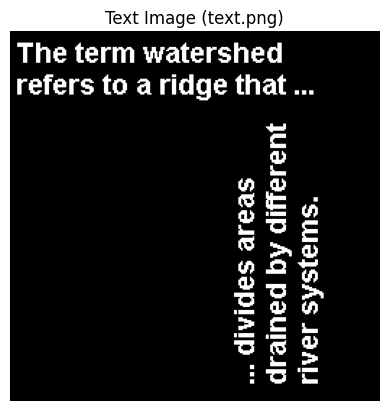

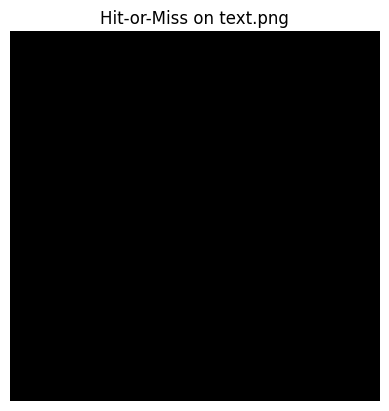

In [12]:
# Binarize 'text.png' image using a threshold (needed for Hit-or-Miss)
_, binary_text_image = cv2.threshold(text_image, 127, 255, cv2.THRESH_BINARY)

# Define a simple 3x3 structuring element for Hit-or-Miss
hit_or_miss_kernel = np.array([[0, 1, 0],
                               [1, -1, 1],
                               [0, 1, 0]], dtype=np.int8)

# Apply the Hit-or-Miss operation
hit_or_miss_result = cv2.morphologyEx(binary_text_image, cv2.MORPH_HITMISS, hit_or_miss_kernel)

# Display 'text.png'
plt.imshow(text_image, cmap='gray')
plt.title('Text Image (text.png)')
plt.axis('off')
plt.show()


# Display the result of Hit-or-Miss
plt.imshow(hit_or_miss_result, cmap='gray')
plt.title('Hit-or-Miss on text.png')
plt.axis('off')
plt.show()




---

# Hit-or-Miss sur text.png avec deux noyaux appropriés Be et Bi

---



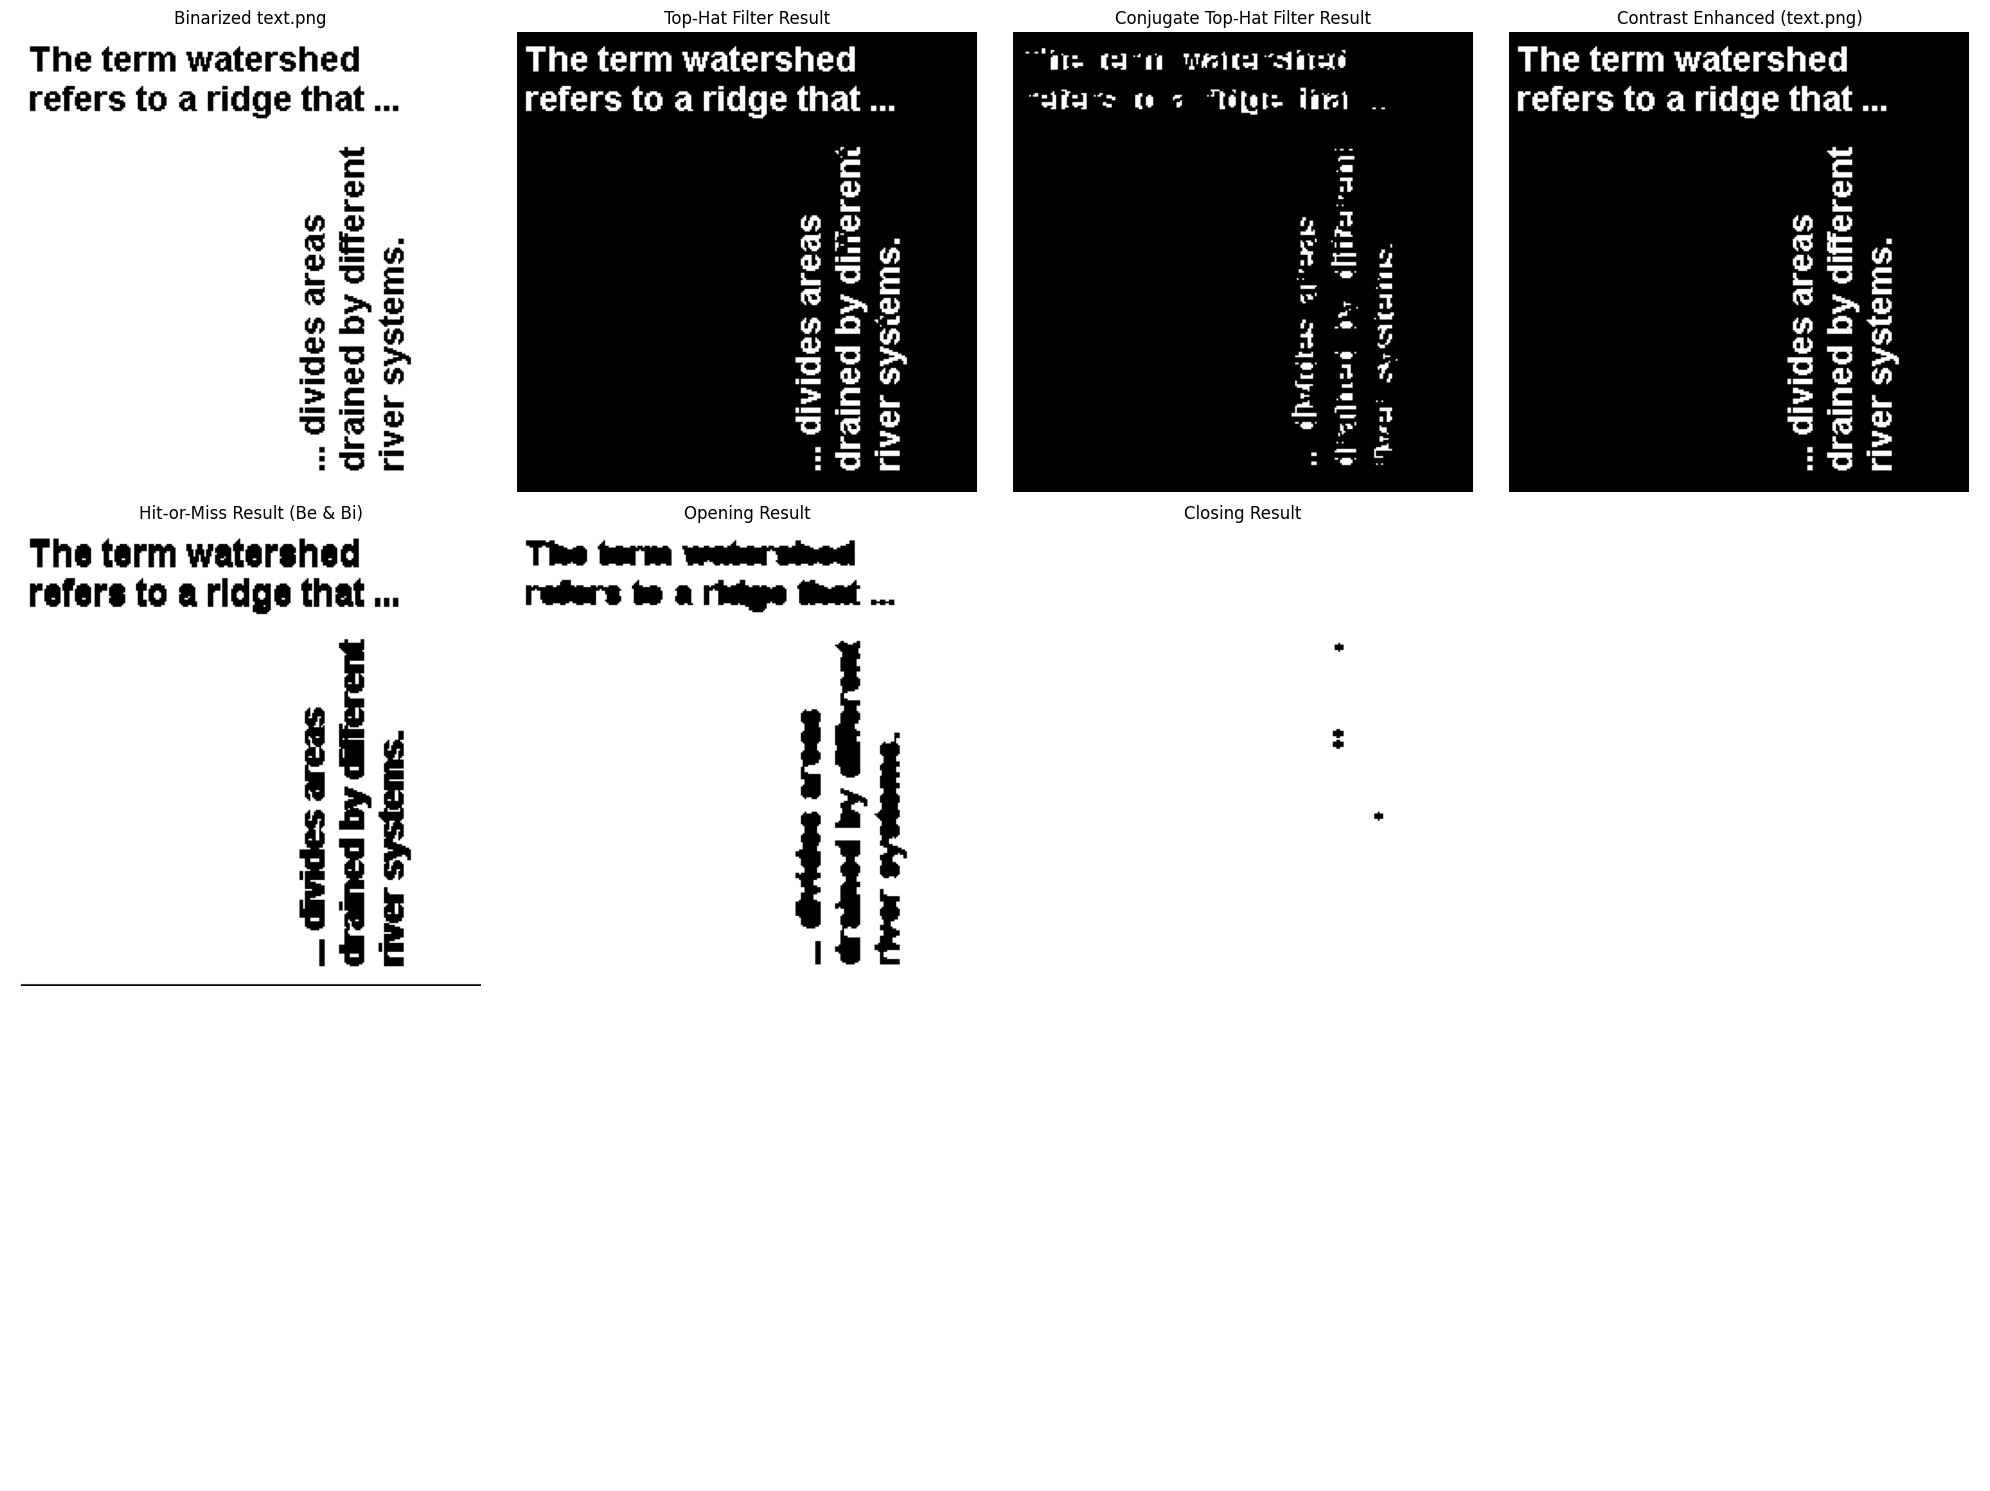

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the text image
text_image = cv2.imread("text.png", cv2.IMREAD_GRAYSCALE)

# Binarize 'text.png' image using a threshold
_, binary_text_image = cv2.threshold(text_image, 127, 255, cv2.THRESH_BINARY)

# Invert the binary image to ensure text is 1 (white) and background is 0 (black)
binary_text_image = cv2.bitwise_not(binary_text_image)

# Define Be and Bi kernels
# Kernel for detecting horizontal text (vertical line)
hit_or_miss_kernel_Be = np.array([[0, 1, 0],
                                   [0, 1, 0],
                                   [0, 1, 0]], dtype=np.uint8)

# Kernel for detecting the background (horizontal line)
hit_or_miss_kernel_Bi = np.array([[0, 0, 0],
                                   [0, 0, 0],
                                   [1, 1, 1]], dtype=np.uint8)

# Hit-or-Miss operation:
# 1. Perform erosion using Be (Hit)
hit_result = cv2.erode(binary_text_image, hit_or_miss_kernel_Be)

# 2. Perform erosion on the complement of the binary image using Bi (Miss)
binary_complement = cv2.bitwise_not(binary_text_image)
miss_result = cv2.erode(binary_complement, hit_or_miss_kernel_Bi)

# 3. Combine the results of the Hit and Miss
hit_or_miss_result = cv2.subtract(hit_result, miss_result)

# To visualize the results better, convert the binary results back to uint8
hit_or_miss_result_display = cv2.normalize(hit_or_miss_result, None, 0, 255, cv2.NORM_MINMAX)

# Define an elliptical structuring element for other filters
kernel_size = (5, 5)
elliptical_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

# Apply Top-Hat filter
top_hat_result = cv2.morphologyEx(text_image, cv2.MORPH_TOPHAT, elliptical_kernel)

# Apply Conjugate Top-Hat filter
conj_top_hat_result = cv2.morphologyEx(text_image, cv2.MORPH_BLACKHAT, elliptical_kernel)

# Apply contrast enhancement (using histogram equalization)
contrast_enhanced_text = cv2.equalizeHist(text_image)

# Apply Opening and Closing filters
opening_result = cv2.morphologyEx(binary_text_image, cv2.MORPH_OPEN, elliptical_kernel)
closing_result = cv2.morphologyEx(binary_text_image, cv2.MORPH_CLOSE, elliptical_kernel)

# Display results
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Original Binarized Image
axs[0, 0].imshow(binary_text_image, cmap='gray')
axs[0, 0].set_title('Binarized text.png')
axs[0, 0].axis('off')

# Top-Hat Result
axs[0, 1].imshow(top_hat_result, cmap='gray')
axs[0, 1].set_title('Top-Hat Filter Result')
axs[0, 1].axis('off')

# Conjugate Top-Hat Result
axs[0, 2].imshow(conj_top_hat_result, cmap='gray')
axs[0, 2].set_title('Conjugate Top-Hat Filter Result')
axs[0, 2].axis('off')

# Contrast Enhanced Result
axs[0, 3].imshow(contrast_enhanced_text, cmap='gray')
axs[0, 3].set_title('Contrast Enhanced (text.png)')
axs[0, 3].axis('off')

# Hit-or-Miss Result
axs[1, 0].imshow(hit_or_miss_result_display, cmap='gray')
axs[1, 0].set_title('Hit-or-Miss Result (Be & Bi)')
axs[1, 0].axis('off')

# Opening Result
axs[1, 1].imshow(opening_result, cmap='gray')
axs[1, 1].set_title('Opening Result')
axs[1, 1].axis('off')

# Closing Result
axs[1, 2].imshow(closing_result, cmap='gray')
axs[1, 2].set_title('Closing Result')
axs[1, 2].axis('off')

# Hide unused subplots
for ax in axs.flat[2:]:
    ax.axis('off')

plt.tight_layout()
plt.show()




---

# Applying Top-Hat, Conjugate Top-Hat, and Contrast Enhancement Filters


---




## sur BLOOD1.TIF

---

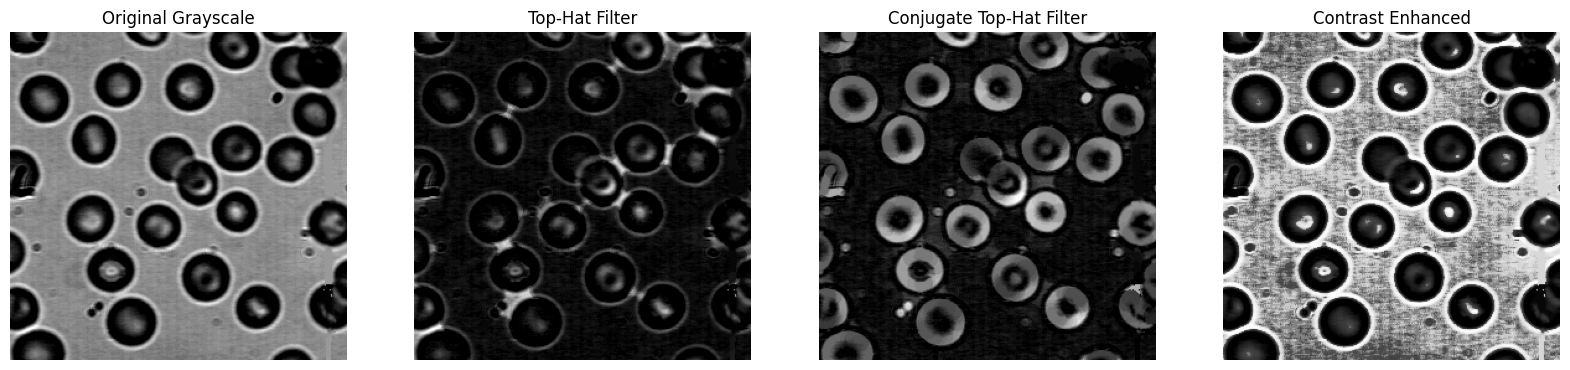

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the micro-blood.gif image
micro_blood_image_path = "/content/BLOOD1.TIF"  # Make sure this path is correct

# Read the image
micro_blood_image = cv2.imread(micro_blood_image_path)

# Check if the image is loaded correctly
if micro_blood_image is None:
    print(f"Error: Could not load image at {micro_blood_image_path}")
else:
    # Convert to grayscale (if the image is in RGB or similar format)
    if len(micro_blood_image.shape) == 3:
        micro_blood_image_gray = cv2.cvtColor(micro_blood_image, cv2.COLOR_BGR2GRAY)
    else:
        micro_blood_image_gray = micro_blood_image

    # Define the structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

    # Apply Top-Hat filter (original - opening)
    top_hat_image = cv2.morphologyEx(micro_blood_image_gray, cv2.MORPH_TOPHAT, kernel)

    # Apply Conjugate Top-Hat filter (closing - original)
    conj_top_hat_image = cv2.morphologyEx(micro_blood_image_gray, cv2.MORPH_BLACKHAT, kernel)

    # Apply contrast enhancement (using histogram equalization)
    contrast_enhanced_image = cv2.equalizeHist(micro_blood_image_gray)

    # Display the results
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Original Grayscale Image
    axs[0].imshow(micro_blood_image_gray, cmap='gray')
    axs[0].set_title('Original Grayscale')
    axs[0].axis('off')

    # Top-Hat Result
    axs[1].imshow(top_hat_image, cmap='gray')
    axs[1].set_title('Top-Hat Filter')
    axs[1].axis('off')

    # Conjugate Top-Hat Result
    axs[2].imshow(conj_top_hat_image, cmap='gray')
    axs[2].set_title('Conjugate Top-Hat Filter')
    axs[2].axis('off')

    # Contrast Enhanced Result
    axs[3].imshow(contrast_enhanced_image, cmap='gray')
    axs[3].set_title('Contrast Enhanced')
    axs[3].axis('off')

    plt.show()


## sur micro-blood.gif

---

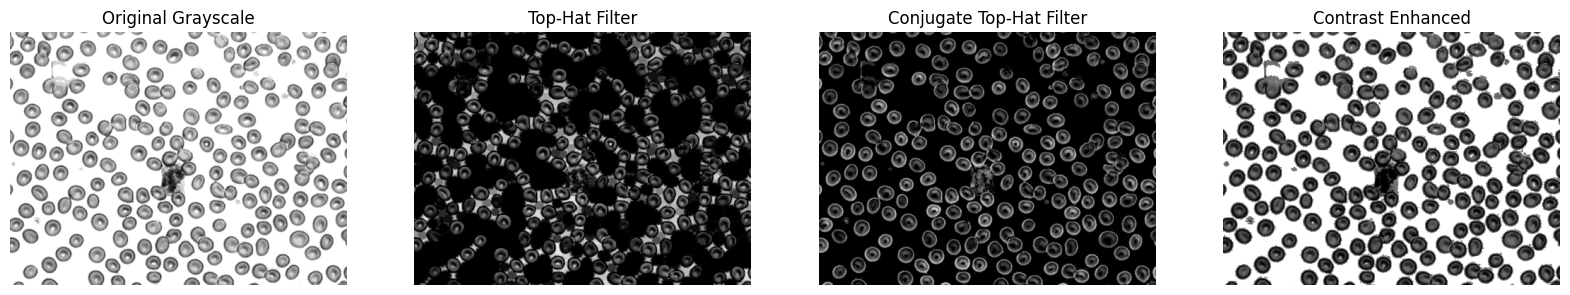

In [9]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the micro-blood.gif using PIL
micro_blood_image_path = "/content/micro-blood.gif"

try:
    # Open the GIF image and extract the first frame (if it is animated)
    gif_image = Image.open(micro_blood_image_path)
    micro_blood_image = np.array(gif_image.convert('L'))  # Convert to grayscale
except Exception as e:
    print(f"Error loading image: {e}")
else:
    # Define the structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

    # Apply Top-Hat filter (original - opening)
    top_hat_image = cv2.morphologyEx(micro_blood_image, cv2.MORPH_TOPHAT, kernel)

    # Apply Conjugate Top-Hat filter (closing - original)
    conj_top_hat_image = cv2.morphologyEx(micro_blood_image, cv2.MORPH_BLACKHAT, kernel)

    # Apply contrast enhancement (using histogram equalization)
    contrast_enhanced_image = cv2.equalizeHist(micro_blood_image)

    # Display the results
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Original Grayscale Image
    axs[0].imshow(micro_blood_image, cmap='gray')
    axs[0].set_title('Original Grayscale')
    axs[0].axis('off')

    # Top-Hat Result
    axs[1].imshow(top_hat_image, cmap='gray')
    axs[1].set_title('Top-Hat Filter')
    axs[1].axis('off')

    # Conjugate Top-Hat Result
    axs[2].imshow(conj_top_hat_image, cmap='gray')
    axs[2].set_title('Conjugate Top-Hat Filter')
    axs[2].axis('off')

    # Contrast Enhanced Result
    axs[3].imshow(contrast_enhanced_image, cmap='gray')
    axs[3].set_title('Contrast Enhanced')
    axs[3].axis('off')

    plt.show()



## sur brain.png & Image_Normal.png

---

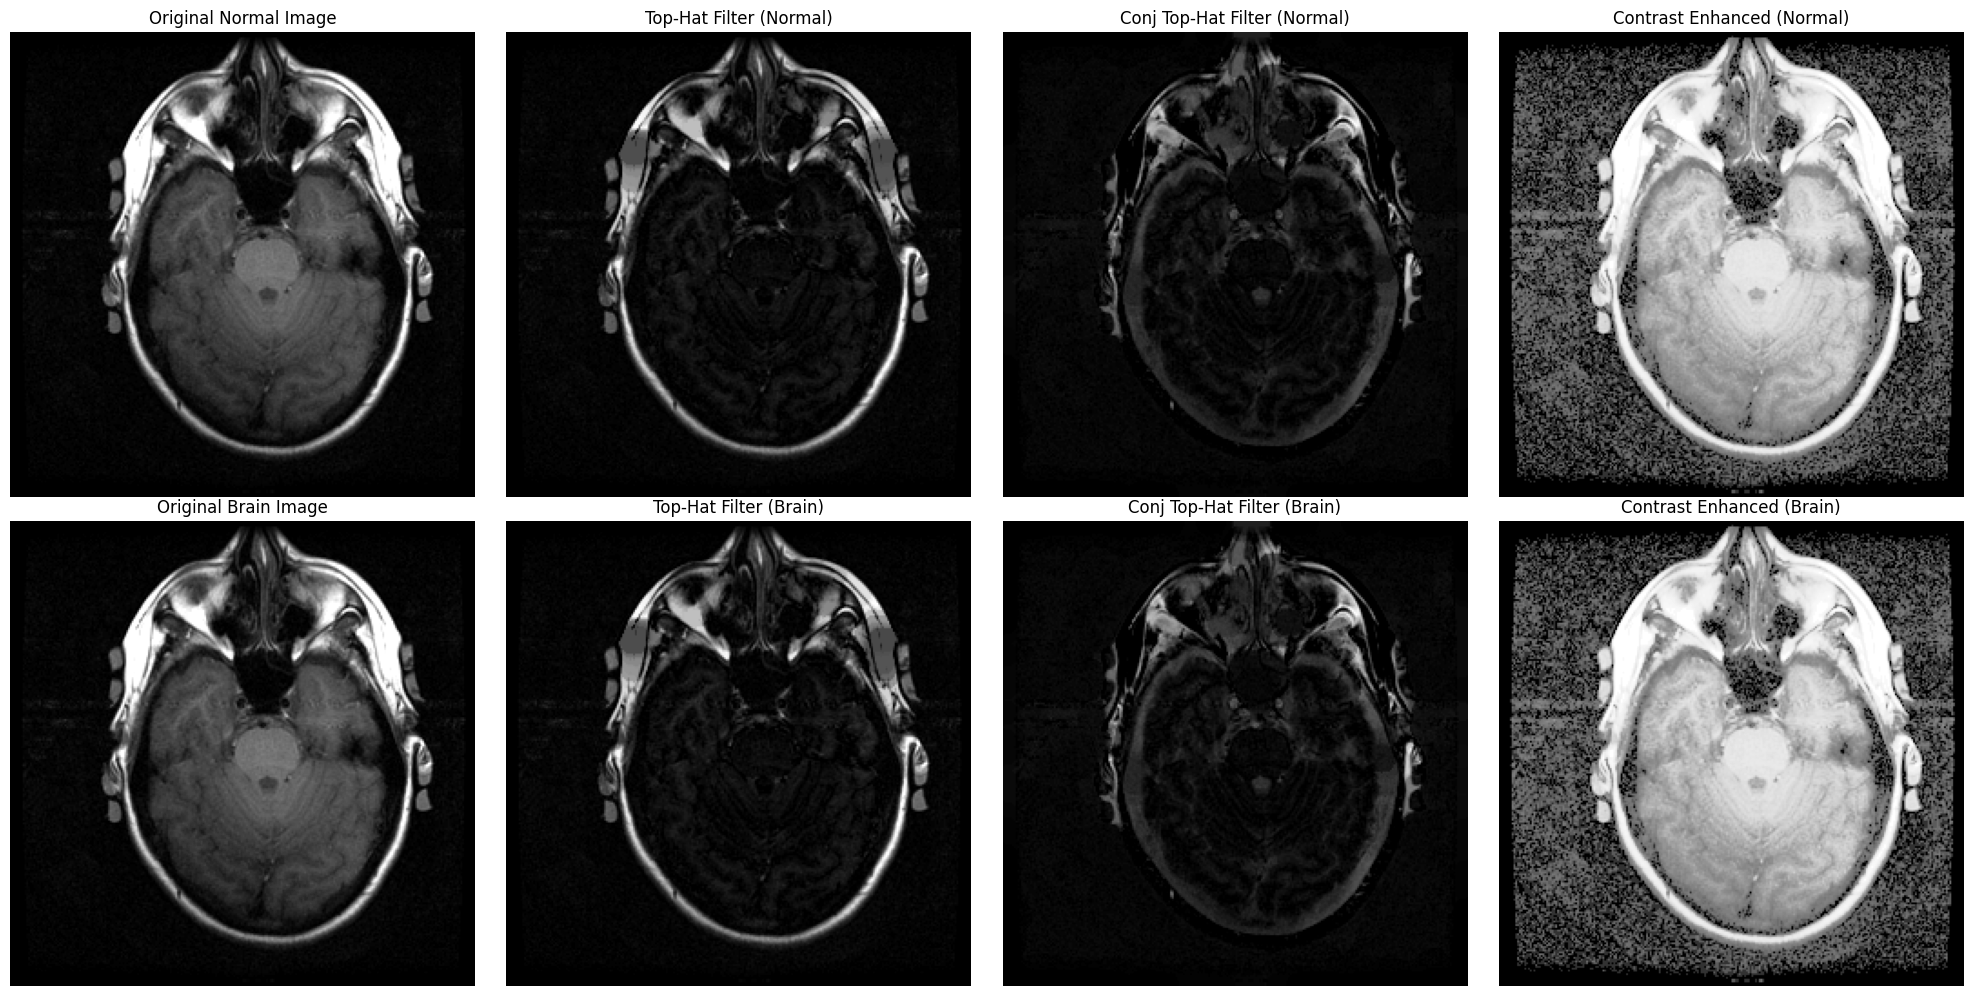

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your images
normal_image_path = "/content/Image_Normal.png"  # Replace with the actual path
brain_image_path = "/content/brain.png"    # Replace with the actual path

# Load the normal and brain MRI images
normal_image = cv2.imread(normal_image_path, cv2.IMREAD_GRAYSCALE)
brain_image = cv2.imread(brain_image_path, cv2.IMREAD_GRAYSCALE)

if normal_image is None or brain_image is None:
    print("Error: Could not load one or more images.")
else:
    # Define an elliptical structuring element
    kernel_size = (15, 15)  # Size of the kernel
    elliptical_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

    # Apply Top-Hat filter (original - opening)
    normal_top_hat = cv2.morphologyEx(normal_image, cv2.MORPH_TOPHAT, elliptical_kernel)
    brain_top_hat = cv2.morphologyEx(brain_image, cv2.MORPH_TOPHAT, elliptical_kernel)

    # Apply Conjugate Top-Hat filter (closing - original)
    normal_conj_top_hat = cv2.morphologyEx(normal_image, cv2.MORPH_BLACKHAT, elliptical_kernel)
    brain_conj_top_hat = cv2.morphologyEx(brain_image, cv2.MORPH_BLACKHAT, elliptical_kernel)

    # Apply contrast enhancement (using histogram equalization)
    normal_contrast_enhanced = cv2.equalizeHist(normal_image)
    brain_contrast_enhanced = cv2.equalizeHist(brain_image)

    # Display results
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Changed to 2 rows

    # Normal Image Results
    axs[0, 0].imshow(normal_image, cmap='gray')
    axs[0, 0].set_title('Original Normal Image')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(normal_top_hat, cmap='gray')
    axs[0, 1].set_title('Top-Hat Filter (Normal)')
    axs[0, 1].axis('off')

    axs[0, 2].imshow(normal_conj_top_hat, cmap='gray')
    axs[0, 2].set_title('Conj Top-Hat Filter (Normal)')
    axs[0, 2].axis('off')

    axs[0, 3].imshow(normal_contrast_enhanced, cmap='gray')
    axs[0, 3].set_title('Contrast Enhanced (Normal)')
    axs[0, 3].axis('off')

    # Brain Image Results
    axs[1, 0].imshow(brain_image, cmap='gray')
    axs[1, 0].set_title('Original Brain Image')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(brain_top_hat, cmap='gray')
    axs[1, 1].set_title('Top-Hat Filter (Brain)')
    axs[1, 1].axis('off')

    axs[1, 2].imshow(brain_conj_top_hat, cmap='gray')
    axs[1, 2].set_title('Conj Top-Hat Filter (Brain)')
    axs[1, 2].axis('off')

    axs[1, 3].imshow(brain_contrast_enhanced, cmap='gray')
    axs[1, 3].set_title('Contrast Enhanced (Brain)')
    axs[1, 3].axis('off')

    plt.tight_layout()
    plt.show()




---

# Hit or Miss (on RMS, breast and BLOOD1)

---



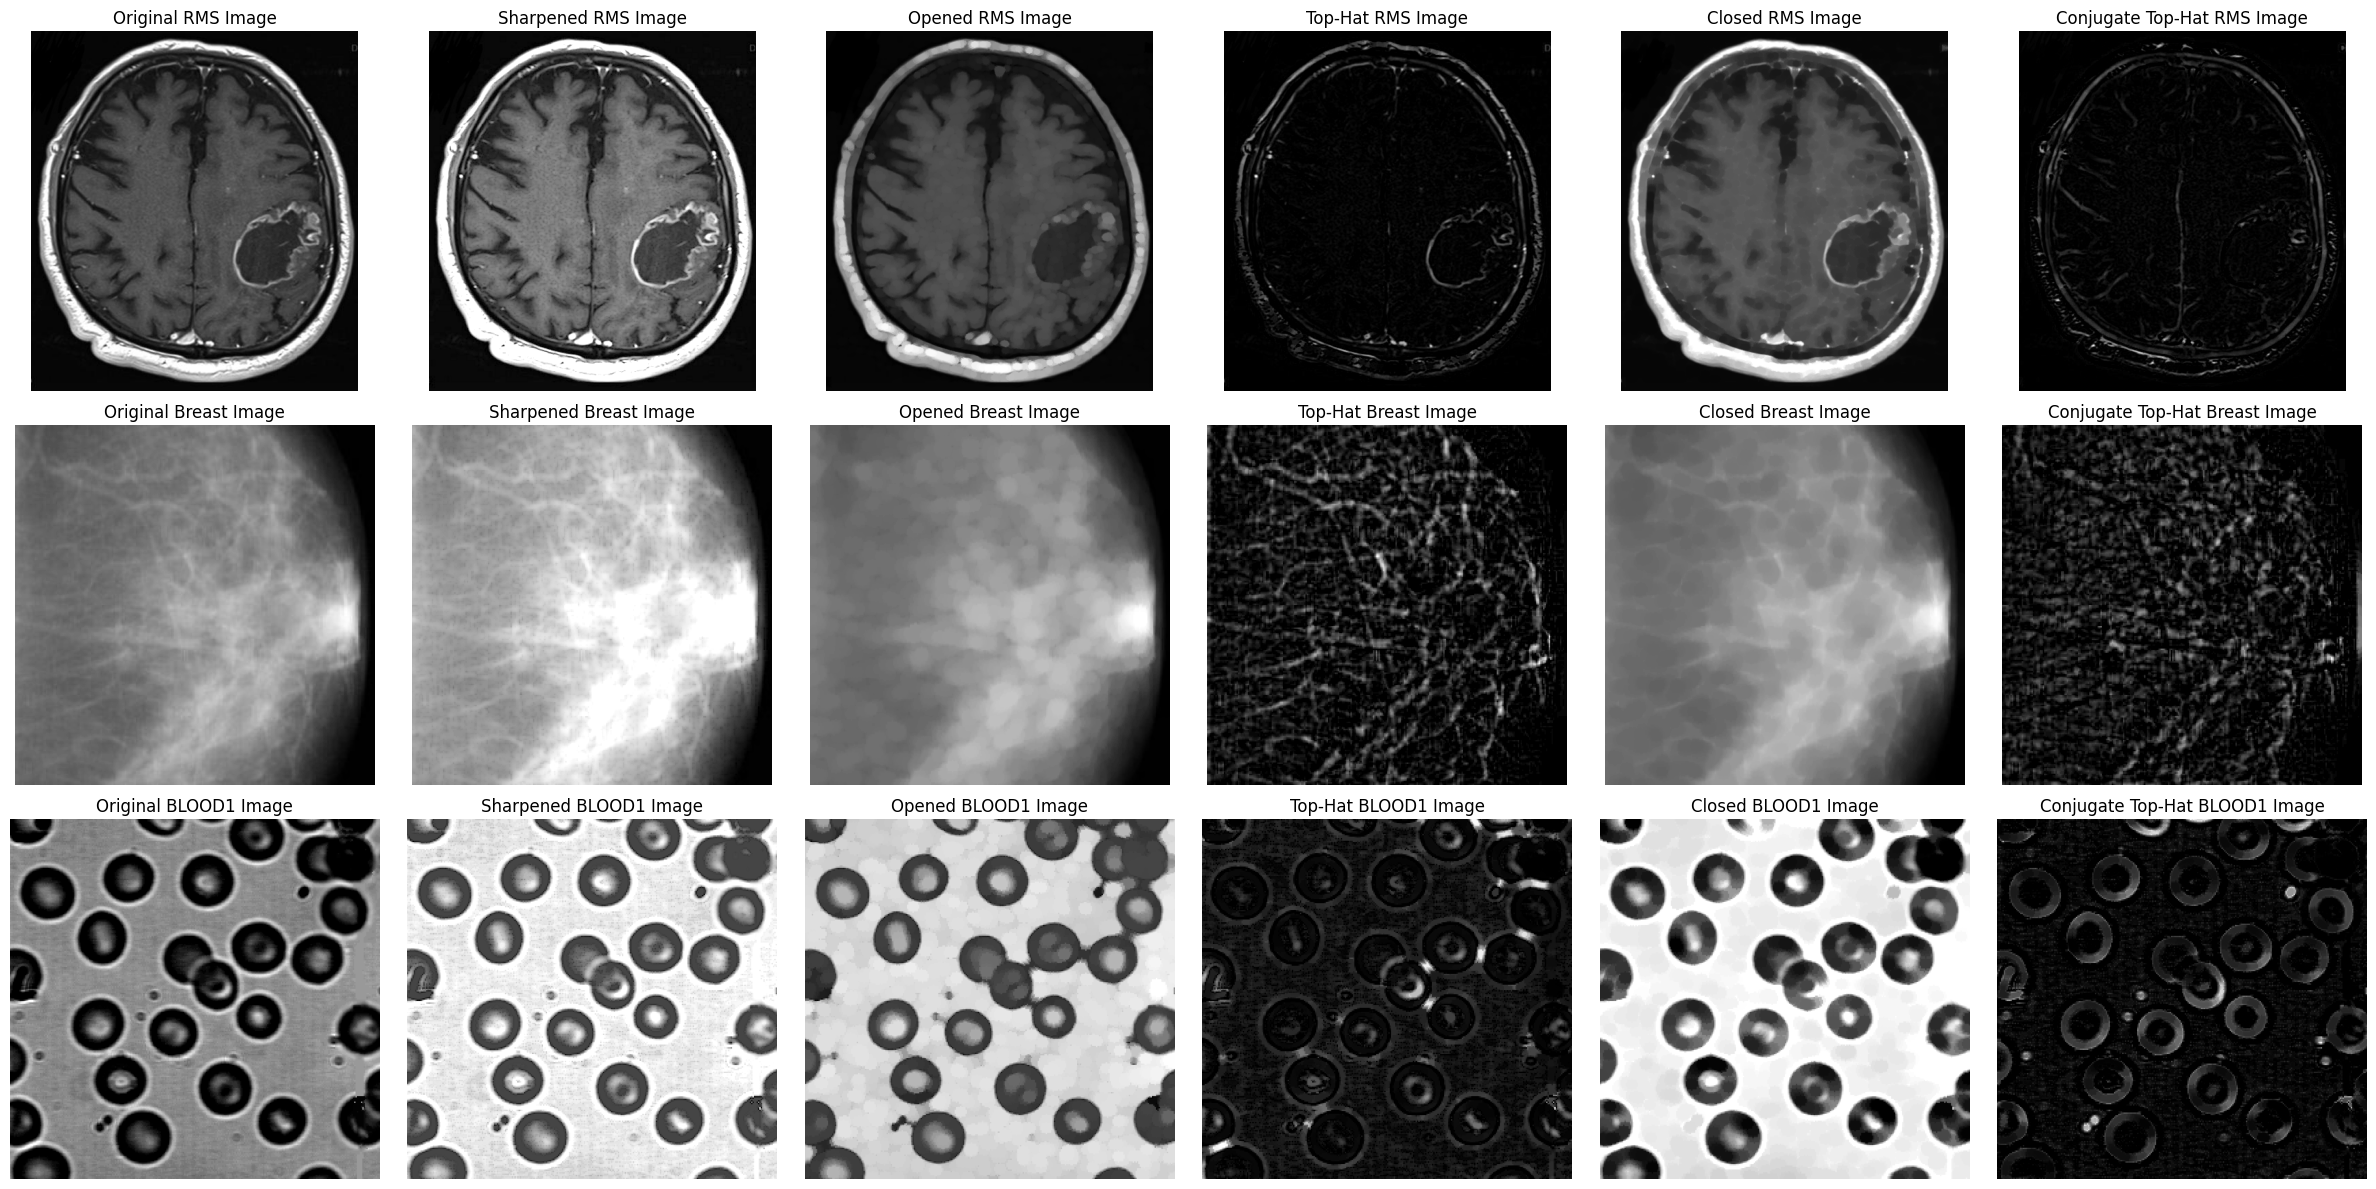

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images in grayscale
image_rms = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)
image_breast = cv2.imread('breast256.png', cv2.IMREAD_GRAYSCALE)
image_blood = cv2.imread('/content/BLOOD1.TIF', cv2.IMREAD_GRAYSCALE)

# Create an elliptical kernel (25x25)
kernel_ellipse_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

# Function to apply the morphological operations and transformations
def process_image(image, kernel):
    # Apply opening
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # Apply closing
    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # Calculate top-hat transformation: Original - Opening
    top_hat_image = cv2.subtract(image, opened_image)

    # Calculate conjugate top-hat transformation: Closing - Original
    conjugate_top_hat_image = cv2.subtract(closed_image, image)

    return opened_image, closed_image, top_hat_image, conjugate_top_hat_image

# Process the RMS and breast images using large kernel
opened_rms, closed_rms, top_hat_rms, conjugate_top_hat_rms = process_image(image_rms, kernel_ellipse_small)
opened_breast, closed_breast, top_hat_breast, conjugate_top_hat_breast = process_image(image_breast, kernel_ellipse_small)

# Process the BLOOD1 image using the sharpen function and small kernel
def sharpen_image(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    sharpened = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)
    return sharpened

# Sharpen the BLOOD1 and RMS images
sharpened_blood = sharpen_image(image_blood)
sharpened_rms = sharpen_image(image_rms)
sharpened_breast_image = sharpen_image(image_breast)


# Apply opening and closing to the sharpened BLOOD1 image
opened_blood, closed_blood, top_hat_blood, conjugate_top_hat_blood = process_image(sharpened_blood, kernel_ellipse_small)

# Set up subplots to show all images
fig, axes = plt.subplots(3, 6, figsize=(24, 12))

# Plot RMS images
axes[0, 0].imshow(image_rms, cmap='gray')
axes[0, 0].set_title('Original RMS Image')
axes[0, 0].axis('off')
axes[0, 1].imshow(sharpened_rms, cmap='gray')
axes[0, 1].set_title('Sharpened RMS Image')
axes[0, 1].axis('off')
axes[0, 2].imshow(opened_rms, cmap='gray')
axes[0, 2].set_title('Opened RMS Image')
axes[0, 2].axis('off')
axes[0, 3].imshow(top_hat_rms, cmap='gray')
axes[0, 3].set_title('Top-Hat RMS Image')
axes[0, 3].axis('off')
axes[0, 4].imshow(closed_rms, cmap='gray')
axes[0, 4].set_title('Closed RMS Image')
axes[0, 4].axis('off')
axes[0, 5].imshow(conjugate_top_hat_rms, cmap='gray')
axes[0, 5].set_title('Conjugate Top-Hat RMS Image')
axes[0, 5].axis('off')

# Plot breast images
axes[1, 0].imshow(image_breast, cmap='gray')
axes[1, 0].set_title('Original Breast Image')
axes[1, 0].axis('off')
axes[1, 1].imshow(sharpened_breast_image, cmap='gray')
axes[1, 1].set_title('Sharpened Breast Image')
axes[1, 1].axis('off')
axes[1, 2].imshow(opened_breast, cmap='gray')
axes[1, 2].set_title('Opened Breast Image')
axes[1, 2].axis('off')
axes[1, 3].imshow(top_hat_breast, cmap='gray')
axes[1, 3].set_title('Top-Hat Breast Image')
axes[1, 3].axis('off')
axes[1, 4].imshow(closed_breast, cmap='gray')
axes[1, 4].set_title('Closed Breast Image')
axes[1, 4].axis('off')
axes[1, 5].imshow(conjugate_top_hat_breast, cmap='gray')
axes[1, 5].set_title('Conjugate Top-Hat Breast Image')
axes[1, 5].axis('off')

# Plot BLOOD1 images
axes[2, 0].imshow(image_blood, cmap='gray')
axes[2, 0].set_title('Original BLOOD1 Image')
axes[2, 0].axis('off')
axes[2, 1].imshow(sharpened_blood, cmap='gray')
axes[2, 1].set_title('Sharpened BLOOD1 Image')
axes[2, 1].axis('off')
axes[2, 2].imshow(opened_blood, cmap='gray')
axes[2, 2].set_title('Opened BLOOD1 Image')
axes[2, 2].axis('off')
axes[2, 3].imshow(top_hat_blood, cmap='gray')
axes[2, 3].set_title('Top-Hat BLOOD1 Image')
axes[2, 3].axis('off')
axes[2, 4].imshow(closed_blood, cmap='gray')
axes[2, 4].set_title('Closed BLOOD1 Image')
axes[2, 4].axis('off')
axes[2, 5].imshow(conjugate_top_hat_blood, cmap='gray')
axes[2, 5].set_title('Conjugate Top-Hat BLOOD1 Image')
axes[2, 5].axis('off')

# Adjust layout and show all images in a grid
plt.tight_layout()
plt.show()
